In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
from dynamic_tasker.orbits import *
from dynamic_tasker.constants import Constants

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.rcParams['text.latex.preamble'] = r'''
    \usepackage[T1]{fontenc}
    \usepackage{XCharter}
    \usepackage[charter,vvarbb,scaled=1.05]{newtxmath}
'''


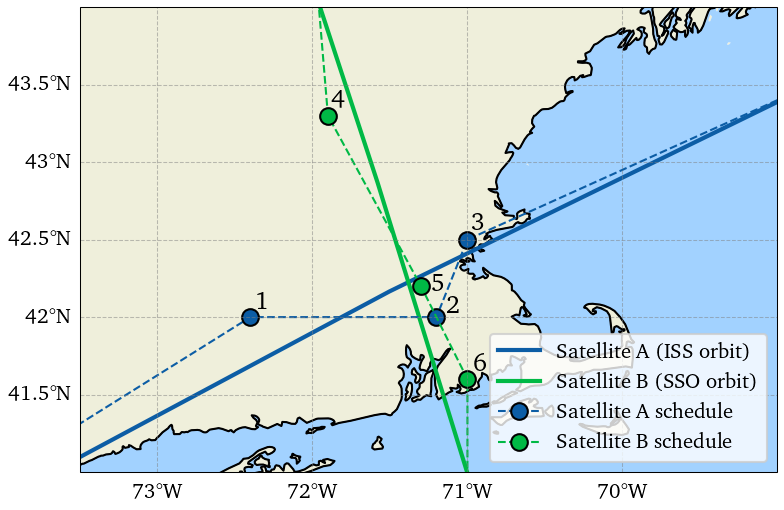

In [19]:
%matplotlib inline

# SSO orbit
orbit_ss = circular_orbit(Constants.R_E + 550, np.deg2rad(97.6), np.deg2rad(39), 0, datetime.datetime(2025, 1, 1))
orbit_iss = circular_orbit(Constants.R_E + 400, np.deg2rad(51.6), np.deg2rad(-13), 0, datetime.datetime(2025, 1, 1))

t = np.linspace(0, 3600, 100)
# Propagate over time and plot
orbit_ss_latlong = np.array([kepler2latlong(orbit_ss, orbit_ss.t + datetime.timedelta(seconds=t_i)) for t_i in t])
orbit_iss_latlong = np.array([kepler2latlong(orbit_iss, orbit_iss.t + datetime.timedelta(seconds=t_i)) for t_i in t])

schedule_iss = np.array([(-74, 41), (-72.4, 42), (-71.2, 42), (-71, 42.5), (-68, 43.85)])
schedule_ss = np.array([(-72, 44.5), (-71.9, 43.3), (-71.3, 42.2), (-71, 41.6), (-71, 40.5)])
labels_iss = ["_", "1", "2", "3", "_"]
labels_ss = ["_", "4", "5", "6", "_"]

label_iss_adjustment = [(0,0), (0,0), (0.025,-0.025), (-0.01,0.01), (0,0)]
label_ss_adjustment = [(0,0), (-0.02,0), (0.03,-0.08), (0,0), (0,0)]
# Plot the orbits
fig, ax = plt.subplots(figsize=(6, 6), dpi=150, subplot_kw={"projection": ccrs.PlateCarree()})
# Add coastlines
# ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN, facecolor='#A2D2FF')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.set_extent([-73.5, -69, 41, 44], crs=ccrs.PlateCarree())

# get colors from cycler...
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot the orbits
ax.plot(orbit_iss_latlong[:, 1], orbit_iss_latlong[:, 0], label="Satellite A (ISS orbit)", linewidth=2)
ax.plot(orbit_ss_latlong[:, 1], orbit_ss_latlong[:, 0], label="Satellite B (SSO orbit)", linewidth=2)

ax.plot(schedule_iss[:, 0], schedule_iss[:, 1], '--', label="Satellite A schedule", linewidth=1, marker='o', markerfacecolor=colors[0], markeredgecolor='k', markersize=8, color=colors[0])
ax.plot(schedule_ss[:, 0], schedule_ss[:, 1], '--', label="Satellite B schedule", linewidth=1, marker='o', markerfacecolor=colors[1], markeredgecolor='k', markersize=8, color=colors[1])

for i in range(len(schedule_ss)):
    if(labels_ss[i] != "_"):
        ax.annotate(labels_iss[i], (schedule_iss[i, 0] + 0.04 + label_iss_adjustment[i][0], schedule_iss[i, 1] + 0.02 + label_iss_adjustment[i][1]), ha='left', va='bottom', fontsize=12)
        ax.annotate(labels_ss[i], (schedule_ss[i, 0] + 0.04 + label_ss_adjustment[i][0], schedule_ss[i, 1] + 0.02 + label_ss_adjustment[i][1]), ha='left', va='bottom', fontsize=12)

gridlines = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gridlines.top_labels = False    # Disable labels at the top
gridlines.right_labels = False  # Disable labels on the right

ax.legend(frameon=True)
plt.savefig("constellation_extension_base.svg")
plt.show()

